## import

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

## only the coins touching the boundary of the image

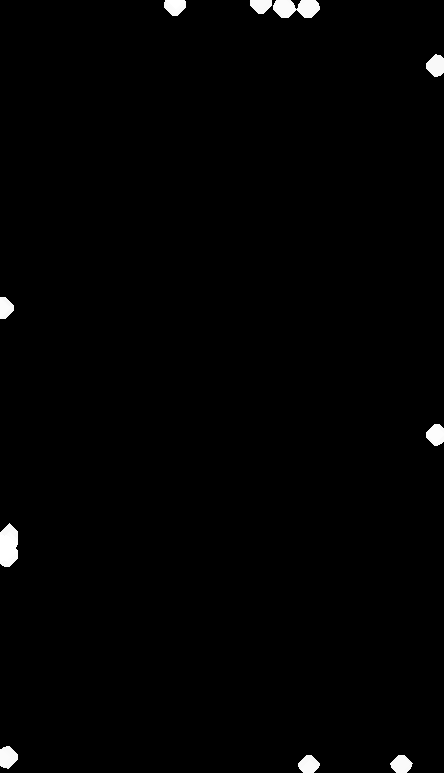

In [0]:
I = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)
# cv2_imshow(I)

kernel = np.array([
          [0,0,0,0,1,0,0,0,0],
          [0,0,0,1,1,1,0,0,0],
          [0,0,1,1,1,1,1,0,0],
          [0,1,1,1,1,1,1,1,0],
          [1,1,1,1,1,1,1,1,1],
          [0,1,1,1,1,1,1,1,0],
          [0,0,1,1,1,1,1,0,0],
          [0,0,0,1,1,1,0,0,0],
          [0,0,0,0,1,0,0,0,0]
], dtype='uint8')
erosion = cv2.erode(I,kernel,iterations = 2)

d = 10
for i in range(d, I.shape[0]-d):
  for j in range(d, I.shape[1]-d):
    erosion[i,j] = 0

dilation = cv2.dilate(erosion,kernel,iterations = 2)
cv2_imshow(dilation)

## only non-overlapping coins.

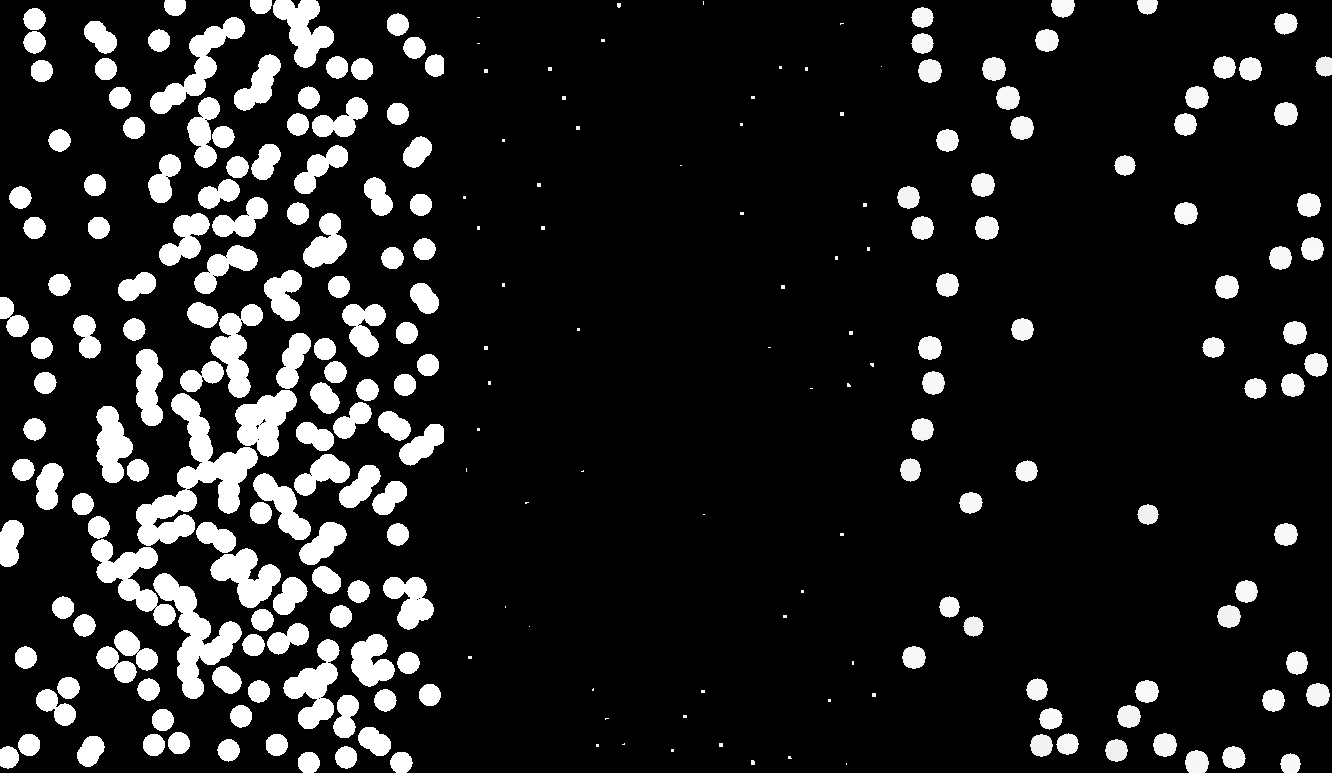

In [68]:
coins = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)

ksize = 27  # kernel size 27
bsize = 1  # boundary size 1
dsize = 7 # disk size 8

kernel = np.zeros((ksize,ksize))
kernel[0:bsize, :] = -1
kernel[ksize-bsize:ksize, :] = -1
kernel[:, 0:bsize] = -1
kernel[:, ksize-bsize:ksize] = -1
kernel[dsize:ksize-dsize, dsize:ksize-dsize] = 1

mcoins = cv2.morphologyEx(coins, cv2.MORPH_HITMISS, kernel)
output = cv2.dilate(mcoins, morp.disk(10))
cv2_imshow(np.hstack((coins, mcoins, output)))

## only the coins which overlap with each other

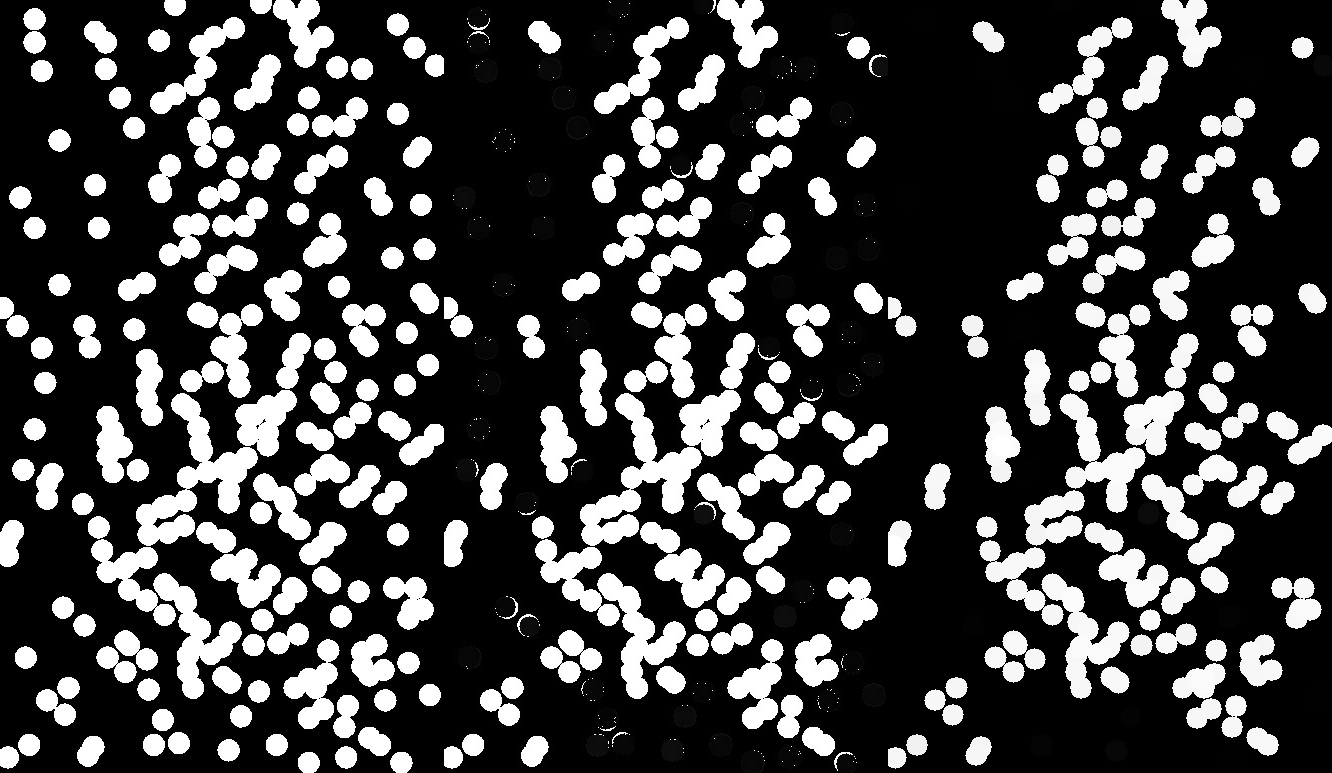

In [71]:
coins = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)

ksize = 27  # kernel size 27
bsize = 1  # boundary size 1
dsize = 7 # disk size 8

kernel = np.zeros((ksize,ksize))
kernel[0:bsize, :] = -1
kernel[ksize-bsize:ksize, :] = -1
kernel[:, 0:bsize] = -1
kernel[:, ksize-bsize:ksize] = -1
kernel[dsize:ksize-dsize, dsize:ksize-dsize] = 1

mcoins = cv2.morphologyEx(coins, cv2.MORPH_HITMISS, kernel)
dcoins = cv2.dilate(mcoins, morp.disk(10))

# now subtract
scoins = coins - dcoins
ecoins = cv2.erode(scoins, morp.disk(10))
output = cv2.dilate(ecoins, morp.disk(10))
cv2_imshow(np.hstack((coins, scoins, output)))